### Import Module

In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35981, done.
remote: Counting objects: 100% (4558/4558), done.
remote: Compressing objects: 100% (1966/1966), done.
remote: Total 35981 (delta 3179), reused 3726 (delta 2573), pack-reused 31423
Receiving objects: 100% (35981/35981), 29.86 MiB | 20.09 MiB/s, done.
Resolving deltas: 100% (25938/25938), done.


In [2]:
%cd ./ultralytics

/content/ultralytics


In [3]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00


In [4]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
data_dir = '/content/drive/MyDrive/DAB/dataset/fused_11945_37'
data_yaml = '/content/drive/MyDrive/DAB/dataset/fused_11945_37/data.yaml'

In [8]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 37,
 'names': ['Enoki Mushroom',
  'Shiitake mushrooms',
  'apple',
  'banana',
  'beaf',
  'bean_sprouts',
  'bellpepper',
  'bread',
  'brocoli',
  'cabbage',
  'carrot',
  'cheese',
  'chicken',
  'chili',
  'corn',
  'cucumber',
  'egg',
  'eggplant',
  'fish',
  'garlic',
  'ginger',
  'green_onion',
  'kimchi',
  'lettuce',
  'mushroom',
  'onion',
  'orange',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'sausage',
  'shrimp',
  'sweet_potato',
  'tofu',
  'tomato',
  'tuna can'],
 'roboflow': {'workspace': 'dab-zgcvo',
  'project': 'food_ingredients_fused',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/dab-zgcvo/food_ingredients_fused/dataset/2'}}

### Train

In [16]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA A100-SXM4-40GB)


In [17]:
from ultralytics import YOLO
import shutil

In [19]:
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/fused0812'
os.makedirs(checkpoint_dir, exist_ok=True)

In [23]:
# 8월 11일자 모델 가중치 로드 (이미 fused에 대해서 50에폭 돌린 상황)
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/simple0811'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))

In [24]:
model.train(
    data=data_yaml,  # 데이터셋 설정 파일
    epochs=50,       # 학습할 총 에폭 수
    imgsz=640,       # 입력 이미지 크기
    batch=32,        # 배치 크기
    cache=True       # 데이터를 메모리에 캐시하여 학습 속도 향상
)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/fused0812/best.pt, data=/content/drive/MyDrive/DAB/dataset/fused_11945_37/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/dataset/fused_11945_37/train/labels.cache... 10287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10287/10287 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/dataset/fused_11945_37/train/images/465_png.rf.264bd51d37910b92d96bbbadf5fae932.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/dataset/fused_11945_37/train/images/465_png.rf.86e33deece5d68f081680c19fefb6160.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/dataset/fused_11945_37/train/images/465_png.rf.9524194d0feb509fdd7eb08fad9ff800.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 375, len(boxes) = 79651. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



train: Caching images (11.8GB RAM): 100%|██████████| 10287/10287 [02:20<00:00, 73.25it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/dataset/fused_11945_37/valid/labels.cache... 599 images, 0 backgrounds, 0 corrupt: 100%|██████████| 599/599 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 4761. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Caching images (0.7GB RAM): 100%|██████████| 599/599 [00:01<00:00, 310.86it/s]


Plotting labels to /content/ultralytics/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        21G     0.2543     0.1714     0.8385        251        640: 100%|██████████| 322/322 [01:49<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]


                   all        599       4761      0.758      0.626      0.673      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      20.8G     0.2817     0.1884      0.845        246        640: 100%|██████████| 322/322 [01:41<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761      0.754      0.599      0.638      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      21.4G      0.295     0.1958     0.8494        208        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.843      0.597      0.686      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      21.1G     0.3138     0.2063     0.8538        279        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]

                   all        599       4761      0.765      0.616      0.647      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      21.6G     0.3149     0.2073     0.8542        247        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.801      0.623      0.648      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      21.6G     0.3145     0.2063     0.8538        320        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        599       4761      0.721      0.686      0.703      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      21.7G     0.3107      0.203     0.8531        273        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        599       4761      0.798      0.604      0.653      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      21.8G     0.3081     0.2019     0.8535        222        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761      0.822       0.58      0.651      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      21.2G     0.3065     0.2008     0.8522        292        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761        0.8       0.63       0.72      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      21.3G     0.3029     0.1991     0.8524        203        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761       0.75      0.614        0.7      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      21.7G     0.3035     0.1994     0.8523        215        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]

                   all        599       4761      0.719      0.623      0.637      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      21.5G     0.2974     0.1959     0.8494        262        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761       0.84      0.621      0.717      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      21.1G      0.293     0.1926     0.8477        308        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.651      0.661       0.68      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      21.7G     0.2902     0.1907     0.8473        230        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761      0.753      0.584      0.645      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      21.3G     0.2873     0.1895     0.8466        286        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        599       4761      0.783      0.626       0.71      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      21.6G     0.2834      0.187     0.8442        304        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.763       0.65      0.711      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      21.6G     0.2783     0.1831     0.8433        284        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]


                   all        599       4761      0.708      0.687      0.708      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      21.6G     0.2777     0.1831     0.8442        363        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        599       4761      0.787      0.606      0.665      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      21.6G     0.2737     0.1807     0.8418        216        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761       0.81      0.646      0.709       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      21.5G     0.2736     0.1807      0.841        195        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]

                   all        599       4761      0.691      0.682      0.711      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      21.1G     0.2664      0.176     0.8394        210        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        599       4761      0.757      0.659      0.681        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      21.4G     0.2628      0.174     0.8368        318        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761      0.793      0.578      0.616      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      21.4G     0.2611      0.173     0.8373        277        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        599       4761      0.691      0.653      0.678      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      21.4G     0.2581     0.1707     0.8376        179        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]


                   all        599       4761      0.685       0.65      0.661      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      21.5G     0.2553     0.1696      0.836        268        640: 100%|██████████| 322/322 [01:38<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.732      0.689      0.718      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      21.4G     0.2535     0.1688      0.836        284        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        599       4761      0.772      0.595      0.653      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      21.2G     0.2498     0.1656     0.8341        236        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.776       0.63      0.643      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      21.6G     0.2473     0.1645     0.8337        246        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]

                   all        599       4761       0.87      0.558      0.659      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      21.6G     0.2441     0.1625      0.833        206        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        599       4761      0.739      0.668      0.732      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      21.6G     0.2426      0.162      0.833        317        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]


                   all        599       4761      0.845      0.585      0.648      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      21.6G     0.2405      0.161     0.8321        286        640: 100%|██████████| 322/322 [01:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.806        0.6      0.647      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      21.2G     0.2364     0.1581     0.8299        232        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        599       4761      0.799       0.61      0.667      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      21.6G     0.2343     0.1562     0.8297        339        640: 100%|██████████| 322/322 [01:38<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.638      0.681      0.675      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      21.3G     0.2318     0.1546     0.8285        208        640: 100%|██████████| 322/322 [01:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761       0.81      0.608      0.674      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      21.3G     0.2297     0.1536     0.8282        275        640: 100%|██████████| 322/322 [01:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.784      0.607      0.692      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      21.5G     0.2265     0.1508     0.8264        238        640: 100%|██████████| 322/322 [01:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        599       4761      0.647      0.685      0.692      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      21.4G     0.2251     0.1512      0.827        292        640: 100%|██████████| 322/322 [01:39<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        599       4761       0.85      0.604      0.697      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      21.6G     0.2241     0.1502     0.8272        332        640: 100%|██████████| 322/322 [01:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.798      0.654      0.719      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      21.5G      0.221     0.1476     0.8271        211        640: 100%|██████████| 322/322 [01:38<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        599       4761      0.825      0.654      0.728      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      21.6G     0.2195     0.1473     0.8254        300        640: 100%|██████████| 322/322 [01:39<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        599       4761      0.775      0.669       0.73      0.529


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      21.6G     0.5932     0.2917      1.068        123        640: 100%|██████████| 322/322 [01:39<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]

                   all        599       4761      0.806       0.65      0.702      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      21.6G      0.547     0.2624      1.034        121        640: 100%|██████████| 322/322 [01:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.783       0.65      0.683      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      21.6G     0.5206     0.2496      1.019        131        640: 100%|██████████| 322/322 [01:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.837      0.632      0.683      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      21.6G     0.5017     0.2381          1        104        640: 100%|██████████| 322/322 [01:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.768      0.697      0.704      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      21.6G     0.4878     0.2302     0.9887        129        640: 100%|██████████| 322/322 [01:37<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.853      0.623      0.688      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      21.5G      0.474     0.2238     0.9808        132        640: 100%|██████████| 322/322 [01:37<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        599       4761      0.755      0.699      0.729      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      21.6G     0.4634     0.2182     0.9768        122        640: 100%|██████████| 322/322 [01:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]

                   all        599       4761      0.802      0.648      0.702      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      21.5G     0.4547     0.2139     0.9703        115        640: 100%|██████████| 322/322 [01:37<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        599       4761      0.822       0.64      0.696      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      21.6G     0.4483     0.2115     0.9663         96        640: 100%|██████████| 322/322 [01:37<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        599       4761      0.825      0.639      0.692      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      21.6G     0.4416      0.208     0.9594        133        640: 100%|██████████| 322/322 [01:37<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

                   all        599       4761      0.833      0.634      0.691      0.539



50 epochs completed in 1.446 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/last.pt, 87.7MB
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/best.pt, 87.7MB

Validating /content/ultralytics/runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 43,635,135 parameters, 0 gradients, 165.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


                   all        599       4761      0.755      0.699      0.729      0.551
                 apple         60        171      0.942      0.945      0.976      0.656
                banana         51        120      0.905      0.875      0.882      0.577
                  beaf          5          5      0.598      0.595      0.562      0.494
          bean_sprouts          1          1      0.526          1      0.995      0.697
            bellpepper        164        176      0.959      0.919      0.948      0.807
               brocoli          7          7      0.452      0.286      0.284      0.231
               cabbage          4          4      0.728          1      0.945      0.822
                carrot        150        188      0.922      0.881      0.917      0.716
               chicken        152        473      0.976      0.953      0.972      0.848
                 chili         71         91      0.948      0.956      0.961      0.804
                  cor

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf2699b7fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

In [25]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train2/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train2/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/fused0812/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/fused0812/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/fused0812_2/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/fused0812_2/last.pt


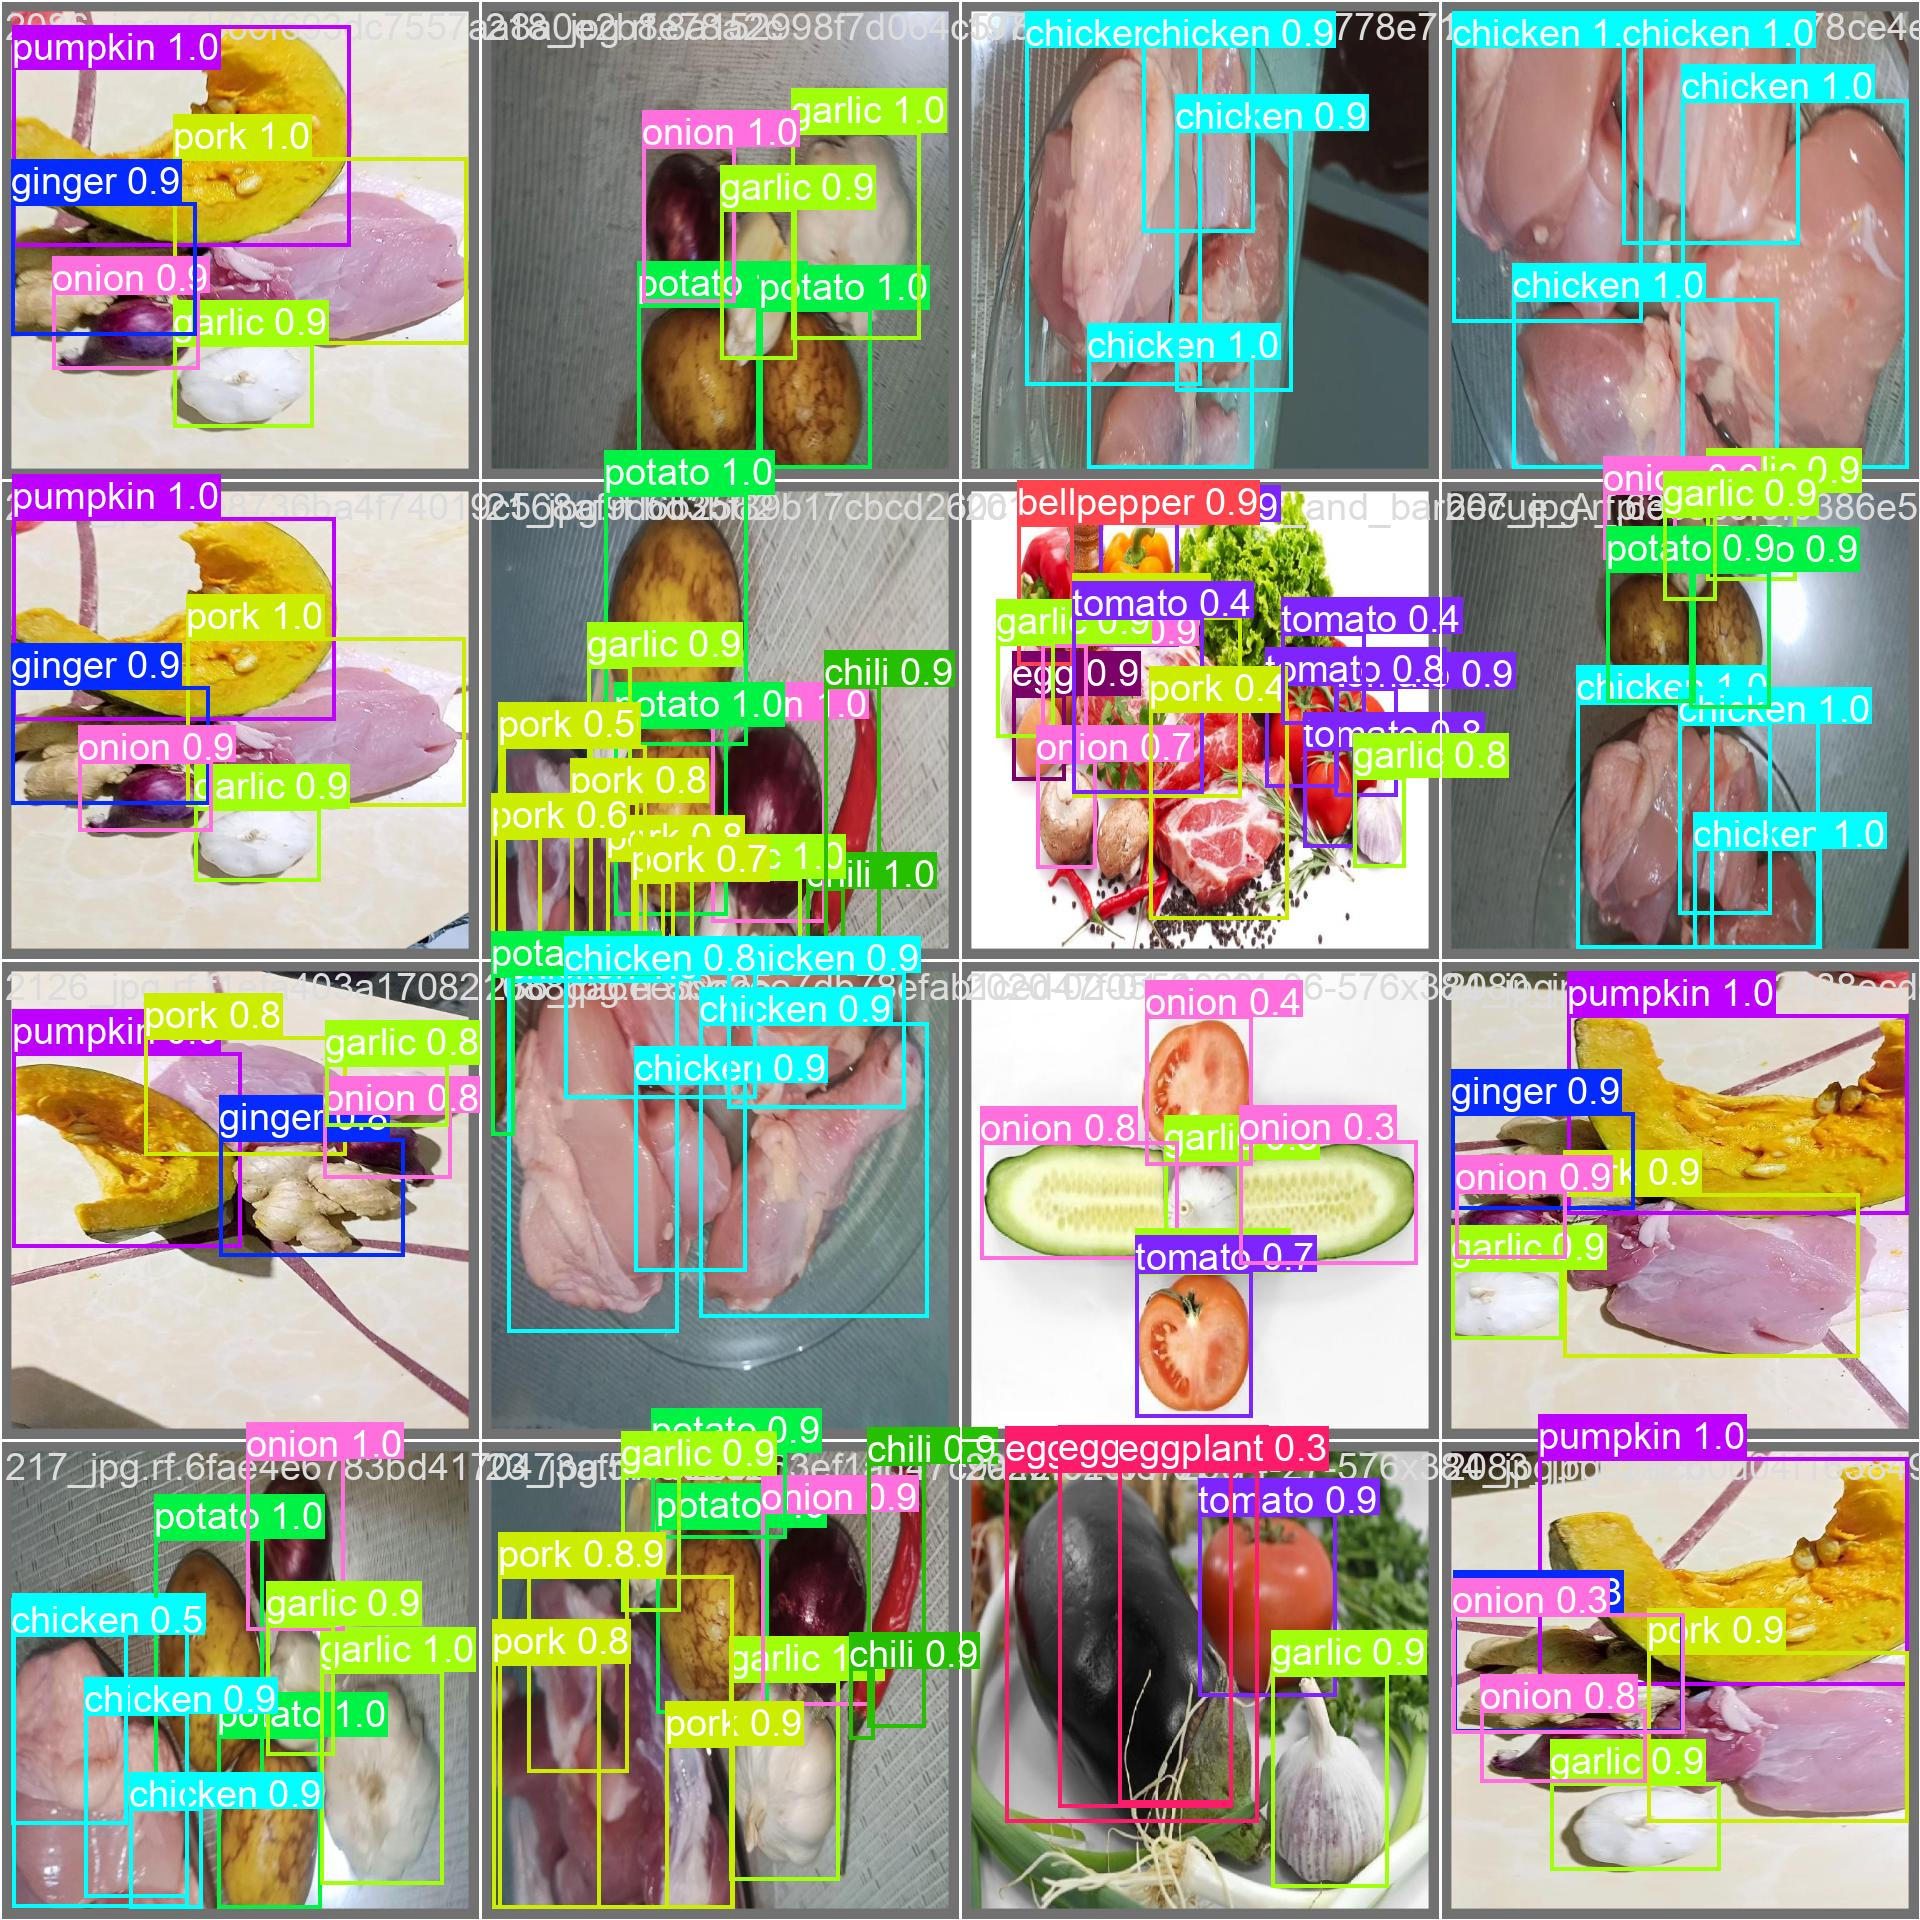

In [28]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train2/val_batch2_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp4.jpg: 640x640 1 chili, 1 potato, 1 tomato, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [199, 199, 199],
        [198, 198, 198],
        [198, 198, 198]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [200, 200, 200],
        [200, 200, 200],
        [200, 200, 200]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [203, 203, 203],
        [203, 203, 203],
        [203, 203, 203]],

       ...,

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]],

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]],

       [[195, 197, 198],
        [195, 197, 198],
        [195, 197, 198],
        ...,
        [153, 157, 162],
        [153, 157, 162],
        [153, 157, 162]]], dtype=uint8)
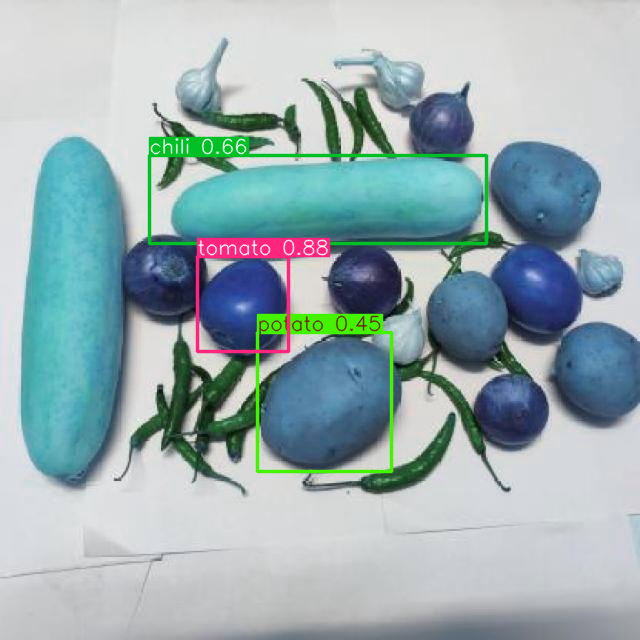

In [35]:
# 처음 마주하는 이미지에 대한 추론 시각화
drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/fused0812/best.pt'
model = YOLO(drive_best_model_path)
results = model('/content/drive/MyDrive/DAB/inference_sample/tmp4.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화